## **Program 5**

## A quantum oracle implementation of the classical OR operation

Toffoli gate implements the quantum version of the classical AND operation. The first part of this exercise will require you to construct such a quantum implementation for the OR operation.
The logical OR operation takes two Boolean inputs and returns 1 as the result if either or both of the inputs are 1. It is often denoted using the $\vee$ symbol (it is also called the disjunction operation). The truth table for the classical OR operation is given below:

| $x$ 	| $y$ 	| $x\vee y$ 	|
|-----	|-----	|-----------	|
| 0   	| 0   	| 0         	|
| 0   	| 1   	| 1         	|
| 1   	| 0   	| 1         	|
| 1   	| 1   	| 1         	|

### De Morgan's laws
Finding a gate that is the direct quantum analogue of the OR operation might prove to be difficult. Luckily, there are a set of two relation in Boolean algebra that can provide a helpful workaround. 
$$\overline{x\vee y} = \overline{x} \wedge \overline{y}$$
This is read as _not ($x$ or $y$) = not $x$ and not $y$_
$$\overline{x\wedge y} = \overline{x} \vee \overline{y}$$
This is read as _not ($x$ or $y$) = not $x$ and not $y$_

## **Problem**

1. Using the expressions for De Morgan's laws above, construct a Boolean formula for $x \vee y$ consisting only of the logical AND and NOT operations. 
2. Prepare `QuantumCircuit()` for a quantum bit oracle to implement the OR operation. Apply the appropriate gates to this circuit based on the expression calculated in Step 1. Do NOT add a measurement

In [1]:
# Importing standard python and Qiskit libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *
basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'cx', 'ccx', 'barrier', 'measure', 'snapshot']

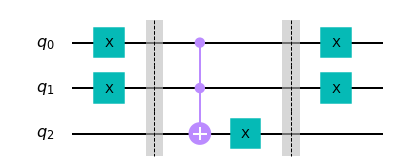

In [2]:
# Implementing Quantum circuit to prepare the Oracle

or_oracle = QuantumCircuit(3)

or_oracle.x(range(2))
or_oracle.barrier()
or_oracle.ccx(0,1,2)
or_oracle.x(2)
or_oracle.barrier()
or_oracle.x(range(2))
# Do not change below this line
or_oracle.draw(output='mpl')

**Checking the results of prepared Oracle**

In [4]:
or_tt = ['000', '011', '101', '111']
def check_or_oracle(tt_row):
    check_qc = QuantumCircuit(3)
    for i in range(2):
        if (tt_row[i] == '1'):
            check_qc.x(i)
    check_qc.extend(or_oracle)
    check_qc.measure_all()
    return (execute(check_qc.reverse_bits(),backend=QasmSimulator(), shots=1).result().get_counts().most_frequent() == tt_row)
try:
    assert list(or_oracle.count_ops()) != [], f"Circuit cannot be empty"
    assert 'measure' not in or_oracle.count_ops(), f"Please remove measurements"
    assert set(or_oracle.count_ops().keys()).difference(basis_gates) == set(), f"Only the following basic gates are allowed: {basis_gates}"
    for tt_row in or_tt:     
        assert check_or_oracle(tt_row), f" Input {state[0:2]}: Your encoding is not correct"
    print("Your oracle construction passed all checks")
except AssertionError as e:
    print(f'Your code has an error:  {e.args[0]}')
    
except Exception as e:
    print(f'This error occured: {e.args[0]}')

Your oracle construction passed all checks
